In [1]:

from __future__ import print_function
import os
import sys

import numpy as np
import pandas as pd

import datetime
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

from keras.layers import Dense,Input, Dropout
from keras.layers import LSTM
from keras.layers import Activation
from keras import optimizers
import keras.backend as K


from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
import matplotlib.pyplot as plt
from random import gauss
from random import seed
#from pandas import Series
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from random import randrange

from sklearn.cross_validation import train_test_split
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import random
from random import gauss
from random import seed
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
from scipy.stats.stats import pearsonr    


C:\Users\murat.ozemre\AppData\Local\Continuum\Anaconda3\envs\Tensor_1\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
Using TensorFlow backend.
C:\Users\murat.ozemre\AppData\Local\Continuum\Anaconda3\envs\Tensor_1\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\murat.ozemre\AppData\Local\Continuum\Anaconda3\envs\Tensor_1\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are differen

In [2]:
from datetime import datetime
datetime.now().strftime('%m-%d %H:%M')

'12-27 20:37'

In [3]:
import Experiment_Ready as exp


In [4]:
os.getcwd()

'C:\\Users\\murat.ozemre\\Desktop\\Thesis_Project\\Data_Learning_Prediction'

In [5]:
os.chdir('C:/Users/murat.ozemre/Desktop/Thesis_Project/Data_Sources_and_Preparation')

In [6]:
Product_Type_Options = [841810,841840,841850]
Product=Product_Type_Options[0] #841810
Exp_Country='TUR' # 'CHN'
Imp_Country='GBR'

if Exp_Country=='CHN':
    Currency='CNY'
    EXP0='TUR'   
elif Exp_Country=='TUR':
    Currency='TRY'
    EXP0='CHN'   

In [7]:
Scaler_Type_Options = ['Normalizer', 'MinMaxScaler','MaxAbsScaler','RobustScaler','StandardScaler' ]
ScalerType=Scaler_Type_Options[2]
print(Product,ScalerType)

MonthSeries="3"
MonthSeries_option=["1","2","3","6","12"]
#MonthSeries_option=["12","123","1236","1236_12","__12","__126","__1263","__12632"]
#MonthSeries_option=["12","123","1236","1236_12","__12"]
#X1hat.iloc[3:,:]


841810 MaxAbsScaler


In [8]:
Data_Core1 = pd.ExcelFile('Data_{}_{}_{}.xlsx'.format(Exp_Country,Imp_Country,Product))
y = Data_Core1.parse('Y', header=0,index_col=None, na_values=['NA'])['{}_{}_{}'.format(Exp_Country,Imp_Country,Product)]
Z = Data_Core1.parse('Y', header=0,index_col=None, na_values=['NA'])[['Date','Year','Month']]

X = Data_Core1.parse('X{}'.format(MonthSeries), header=0,index_col=None, na_values=['NA'])
X.drop(['Date','Year','Month'], axis=1, inplace=True)
X_Column_Names=list(X.columns.values)
n_feature=X.shape[1]

Xhat = Data_Core1.parse('Xhat', header=0,index_col=None, na_values=['NA'])
Xhat.drop(['Date','Year','Month'], axis=1, inplace=True)


In [9]:
# Set X train, X test, y train, y test
rs=42
Scaled_Train_Test_Split=exp.X_Y_scaler_train_test_Split(X,y,Z,random=rs)

X_train = Scaled_Train_Test_Split[0]
X_test = Scaled_Train_Test_Split[1]
y_train = Scaled_Train_Test_Split[2]
y_test = Scaled_Train_Test_Split[3]
scaler_X = Scaled_Train_Test_Split[4]  
scaler_y = Scaled_Train_Test_Split[5]
scaled_value_X=Scaled_Train_Test_Split[6]
scaled_value_y=Scaled_Train_Test_Split[7]

In [10]:
exp.randomforest(X_train, X_test, y_train, y_test,scaler_y,est=100,rand=20,is_random_fixed='FALSE')

randomforest rs= 25


((1753, 2307, 0.762), (710, 897, 0.96))

In [11]:
exp.experiment_RandomForest(3,
                  X_train, X_test, y_train, y_test,scaler_y,rand=20,is_random_fixed='FALSE')
#,est=3000,random=50)

randomforest rs= 93
randomforest rs= 51
randomforest rs= 76


([2527, 2432, 2701], [0.717, 0.739, 0.673])

In [12]:
exp.experiment_RandomForest(2,
                  X_train, X_test, y_train, y_test,scaler_y,est=3000,rand=50)

randomforest rs= 50
randomforest rs= 50


([2295, 2295], [0.764, 0.764])

In [13]:
os.chdir('C:/Users/murat.ozemre/Desktop/Thesis_Project/Data_Learning_Prediction/Box_Plots_For_RandomForest')

split rs= 3
randomforest rs= 2
randomforest rs= 45
randomforest rs= 34
randomforest rs= 41
randomforest rs= 3
randomforest rs= 30
randomforest rs= 89
randomforest rs= 72
randomforest rs= 46
randomforest rs= 46
randomforest rs= 96
randomforest rs= 79
Size: 12
             10      log2      sqrt      auto
count  3.000000  3.000000  3.000000  3.000000
mean   0.737333  0.714000  0.723000  0.739000
std    0.004041  0.001732  0.002646  0.003606
min    0.733000  0.712000  0.720000  0.736000
25%    0.735500  0.713500  0.722000  0.737000
50%    0.738000  0.715000  0.724000  0.738000
75%    0.739500  0.715000  0.724500  0.740500
max    0.741000  0.715000  0.725000  0.743000


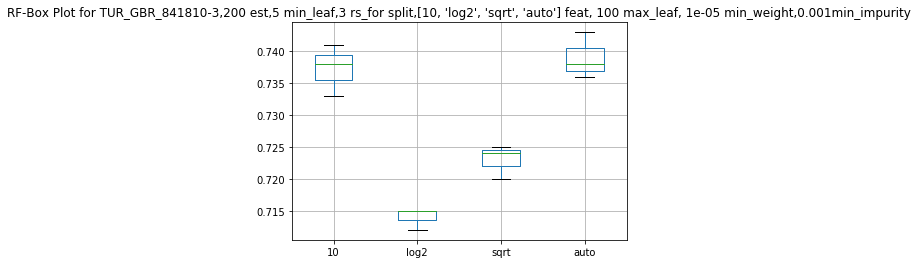

In [14]:
# MAIN for Random Forest Experiments
repeats=3
random_range_for_split=1
rs=random.randint(1,100)
#rs=12
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()

estimator_options = [100,200,500,1000,5000,10000,20000]
min_sample_leaf_options = [1,2,5,20,30]
#random_state_options =[10]
max_features_options=[10,"log2","sqrt","auto"]
max_leaf_nodes_options=[2,5,10,100,200,300] 
min_weight_fraction_leaf_options=[0.00001,0.0001,0.001,0.01,0.1] 
min_impurity_decrease_options =[0.0000001,0.000001,0.001,0.01,0.05]



est=200
min_leaf=5
feat="auto"
max_leaf=100
min_weight=0.00001
min_impurity=0.001

param='TRUE'

for r in range (random_range_for_split):


    rs=random.randint(1,100)

    print('split rs=',rs)
    
    Scaled_Train_Test_Split=exp.X_Y_scaler_train_test_Split(X,y,Z,random=rs)

    X_train = Scaled_Train_Test_Split[0]
    X_test = Scaled_Train_Test_Split[1]
    y_train = Scaled_Train_Test_Split[2]
    y_test = Scaled_Train_Test_Split[3]
    scaler_X = Scaled_Train_Test_Split[4]  
    scaler_y = Scaled_Train_Test_Split[5]
    scaled_value_X=Scaled_Train_Test_Split[6]
    scaled_value_y=Scaled_Train_Test_Split[7]
    
    
    for feat in max_features_options:
        results_exp[str(feat)] =exp.experiment_RandomForest(repeats,
                  X_train, X_test, y_train, y_test,scaler_y,
                  rand=20,is_random_fixed='FALSE',
                  est=est,min_leaf=min_leaf,feat=feat,max_leaf=max_leaf,min_weight=min_weight,min_impurity=min_impurity)[1] 
    
    results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()

plt.title("RF-Box Plot for {}-{},{} est,{} min_leaf,{} rs_for split,{} feat, {} max_leaf, {} min_weight,{}min_impurity"
          .format(y.name,MonthSeries,  est, min_leaf,rs,max_features_options,max_leaf,min_weight,min_impurity))
plt.savefig('RF-Box Plot for {}-{}, {} est,{} min_leaf,{} feat,{} max_leaf, {} min_weight,{}min_impurity.png'
               .format(y.name,MonthSeries,est,min_leaf,max_features_options,max_leaf,min_weight,min_impurity))




    
    

(1816, 2337, 0.756)

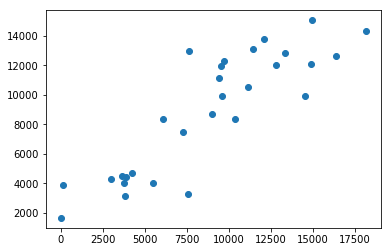

In [15]:
train_X = X_train
test_X = X_test
train_y = y_train 
test_y = y_test
scaler_y = scaler_y

# Random Foest Regressor model
rfc=RandomForestRegressor(n_estimators=3000)

# Random Foest Regressor model train
RandomForestRegressor.fit(rfc,X_train,y_train)

# Random Foest Regressor mode predict
y_predict_test = rfc.predict(X_test)

# Compare predicted Y and real Y 
exp.inverse_scale_and_graph_Y_predict_and_test(y_predict_test,y_test,scaler_y,'YES')

HIC AYAR YAPMADAN FARKLI SPLIT YAPARAK RF CALISMASI
Dort Farklı Calısma Yapıldı
1. Aylık Stratify olmadan her 3 urun kodu için çalıştırıldı
2. Aylık Stratify yapılarak her 3 ürün kodu için çalıştırıldı
3. Aylık Stratify yapılarak aylık fark verisi üzerinden (Xhat) her 3 ürün kodu için çalıştırıldı 
    R2 gercek değeri alındı.
4. Aylık Stratify yapılarak aylık fark verisi üzerinden (Xhat) her 3 ürün kodu için çalıştırıldı 
    R2 o ayın gerçek değerine göre ayarlanarak alındı.


In [ ]:
repeats=1
random_range_for_split=5
rs=random.randint(1,100)
#rs=12
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()

est=500
min_leaf=5
feat="auto"
max_leaf=100
min_weight=0.00001
min_impurity=0.001

param='TRUE'

for r in range (random_range_for_split):

#for r in range(repeats):
    rs=random.randint(1,100)
#    rs=42
    print(rs)
    SplitData=TrainTestSplit(rs,X,y,date,th,random_split)

    
    train_X=SplitData[0] 
    test_X=SplitData[1] 
    train_y=SplitData[2] 
    test_y=SplitData[3]
    scaler_x=SplitData[4]
    scaler_y=SplitData[5]
    split_succesfull=SplitData[7]
    print(split_succesfull)

    experiment_result=experiment_RF(repeats,param,est,min_leaf,rs,
                                    feat,max_leaf,min_weight,min_impurity,
                                    train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]
    
#Xhat için analiz yapıldığı ve Adjusted R2 hesaplandığı zaman [2] nolu output kullanılıyor 
#                                    train_X, test_X, train_y, test_y,scaler_x,scaler_y)[2]

    results[str(r)]= experiment_result
    results_exp[split_succesfull]= experiment_result
    results_split=pd.concat([results_split,results_exp])
    print ('results split',results_split)

results_randomnumber_bins=results
resultvalues=results.values
results_all=resultvalues.reshape((random_range_for_split*repeats,1))
results_all=pd.DataFrame(data=results_all[:,:])

#max_R2=results_all.describe().iloc[7,:]
#std=results_all.describe().iloc[2,:]
#mean=results_all.describe().iloc[1,:]

mean=results_all.describe().values[1]
std=results_all.describe().values[2]
max_R2=results_all.describe().values[7]

results_all.hist()
plt.title('{} and with split threshold {} for {} different run'.format(y.name,th,random_range_for_split))
plt.axis([0, 1, 0, 400])
plt.xlabel('mean {}, std {}, max_value{}'.format(mean,std,max_R2))
#plt.savefig('Distiribution_without_Tuning\Histogram Plot R2 for {} and with (non stratify) split threshold {} for {} different run.png'.format(y.name,th,random_range_for_split))
plt.savefig('Distiribution_without_Tuning\Histogram Plot R2 for {} and with (rs=random) split threshold {} and {} param for {} different run.png'.format(y.name,th,param,random_range_for_split))

pyplot.show()

plt.gcf().clear()
plt.title('{} and with split threshold {}'.format(y.name,th))

results_split.boxplot()
#plt.savefig('Distiribution_without_Tuning\Box Plot R2 for {} and with (non stratify) split threshold {} for {} different run.png'.format(y.name,th,random_range_for_split), format='png', dpi=300)
plt.savefig('Distiribution_without_Tuning\Box Plot R2 for {} and with (rs=random)split threshold {} for {} different run.png'.format(y.name,th,random_range_for_split), format='png', dpi=300)

pyplot.show()                                   

      




Ince Ayar Yapılmadan once (Spilt için RS sabit) ve tuning sonrasındaki karşılaştırma

In [ ]:
repeats=3
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()


#RS =42ye gore bulunan Tuning sonucları: 

#841840 Parametre seti
est=5000
min_leaf=1
feat="log2"
max_leaf=10
min_weight=0.001
min_impurity=0.0000001

#841810 Parametre seti
est=10000
min_leaf=2
feat="sqrt"
max_leaf=150
min_weight=0.01
min_impurity=0.000001

#841850  Parametre seti
est=2000
min_leaf=20
feat=10
max_leaf=50
min_weight=0.1
min_impurity=0.01


#RS =42ye gore bulunan Tuning sonucları: 
#RS =Randoma gore bulunan Tuning sonucları: 

est=10000
min_leaf=5
feat="auto"
max_leaf=100
min_weight=0.00001
min_impurity=0.001

#Etkin olan parametre seti

est=10000
min_leaf=2
feat="sqrt"
max_leaf=150
min_weight=0.01
min_impurity=0.000001

#NN için parametreler
alph= 1e-12
max_iteration= 50000
slv= "adam"
hidden_layer= (30, 30)



param_options=["FALSE","TRUE"]

#Farklı RAndom Seed Splitler
rs=random.randint(1,100)
#Tek bir Random Seed Split
rs=42

SplitData=TrainTestSplit(rs,X,y,date,th,random_split)

train_X=SplitData[0] 
test_X=SplitData[1] 
train_y=SplitData[2] 
test_y=SplitData[3]
scaler_x=SplitData[4]
scaler_y=SplitData[5]
split_succesfull=SplitData[7]


experiment="NN" #or RF
first_loop_range=50
second_loop_range=2
for r in range (0,first_loop_range):
    rs=random.randint(1,100)
   
    SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
    print(rs)
    train_X=SplitData[0] 
    test_X=SplitData[1] 
    train_y=SplitData[2] 
    test_y=SplitData[3]
    scaler_x=SplitData[4]
    scaler_y=SplitData[5]
    split_succesfull=SplitData[7]
    
    
    for p in range (0, second_loop_range):
        
        param=param_options[p]
        
        if experiment=="RF":
            experiment_result=experiment_RF(repeats,param,est,min_leaf,rs,
                                    feat,max_leaf,min_weight,min_impurity,
                                    train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]
        elif experiment=="NN":
             experiment_result=experiment_NN(repeats,param,alph,max_iteration,slv,rseed,hidden_layer,
                          train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]
        
        results_exp[param]= experiment_result
        
#    results_split[split_succesfull]= experiment_result
    results=pd.concat([results,results_exp])

results_randomnumber_bins=results
resultvalues=results.values
results_all=resultvalues.reshape((first_loop_range*second_loop_range*repeats,1))
results_all=pd.DataFrame(data=results_all[:,:])

mean=results_all.describe().values[1]
std=results_all.describe().values[2]
max_R2=results_all.describe().values[7]

plt.gcf().clear()
plt.title('{} with (according rs=42 Tuned and split general) before Tuning and (trained rs=90) after Tuning'.format(y.name))
plt.xlabel('mean {}, std {}, max_value{}'.format(mean,std,max_R2))
results.boxplot()
plt.savefig('Distiribution_without_Tuning\Box Plot R2 for {} and (tuned rs =42)(split=general){} (trained rs=90) different run.png'.format(y.name,repeats), 
            format='png', dpi=300)

pyplot.show()                                   

      




#sonuc=pd.concat([sonuc,calıstır_randomforest(X_train, X_test, y_train, y_test,scaler_y,Product,MonthSerie,ScalerType)])

#max_R2=int((sonuc['R2'].max())*1000)/1000
#filename='Out_Random_Predict_Results_{one}_Product{two}_{four}perc_with max{tre}'.format(one=datetime.now().strftime('Date_%m-%d_Time%H_%M'),
#                                                                                      two=Product,tre=max_R2,four=percentile)
#sonuc.to_excel('{}.xlsx'.format(filename),index = False)      
      



In [ ]:
# LSTM EXPERIMENT

#def experiment(repeats,n_epochs,n_neurons,learning_rate,bs,rs,X,y,date):
def experiment_LSTM(repeats,n_epochs,n_neurons,learning_rate,bs,drop_rate,do_batch,do_model,train_X, test_X, train_y, test_y,scaler_x,scaler_y):
    K.clear_session()

#    print(type(train_X))
    train_X =train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

#    train_X =train_X.reshape((train_X.shape[0], train_X.shape[1],1))
#    test_X = test_X.reshape((test_X.shape[0], test_X.shape[1],1))
#    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
    
    error_rmse = list()
    error_r2hat = list()
    error_r2 = list()
    for r in range(repeats):
        
        print('Shape of X Train',train_X.shape[1],train_X.shape[2])
    

        if do_model=='A':
            model = Sequential() 
            model.add(LSTM(n_neurons,input_shape=(train_X.shape[1], train_X.shape[2])))
            model.add(Dropout(drop_rate))
            
            model.add(Dense(n_neurons))
            model.add(Dropout(drop_rate))
            
            model.add(Dense(1))
#            model.add(Activation('sigmoid'))
            model.add(Activation('linear'))
        
        elif do_model=='B':   
            input_layer=Input(shape=(train_X.shape[1], train_X.shape[2]),dtype='float32')
            lstm_layer1=LSTM(n_neurons,input_shape=(train_X.shape[1],train_X.shape[2]),
                         dropout=drop_rate, 
                         recurrent_dropout=drop_rate,
                         return_sequences=True)(input_layer)
            lstm_layer2=LSTM(n_neurons,input_shape=(train_X.shape[1],n_neurons),
                         dropout=drop_rate, 
                         recurrent_dropout=drop_rate,
                         return_sequences=False)(lstm_layer1)
            dropout_layer=Dropout(drop_rate)(lstm_layer2)

            output_layer=Dense(1,activation="linear")(dropout_layer)
#            output_layer=Dense(1,activation="linear")(lstm_layer2)
         

        #ix layerlarda Activation için RELU Output için linear uygun oluyor. Kaynak Siraj Raval
        
            model=Model(inputs=input_layer, outputs=output_layer)
        
        
        #decay_rate = learning_rate / n_epochs
        
        decay_rate = 0.8
        momentum = 0.9
         
        sgd = optimizers.SGD(lr=learning_rate, clipvalue=0.3,momentum=momentum, decay=decay_rate,nesterov=True)
        adam = optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=decay_rate, amsgrad=False)

        #model.compile(loss='mean_squared_error', optimizer='adam')
        
        
#        model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
        model.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])

#        model=load_model(os.path.join('Data','train_dataset{}-{}neurons.hdf5'.format(y.name,n_neurons)))
#        model=load_model(os.path.join('Data','train_dataset{}-{}neurons.hdf5'.format(y.name,n_neurons)))

        model.summary()
        
        save_weights_at=os.path.join('Data','train_dataset{}-{}neurons.hdf5'.format(y.name,n_neurons))

        save_best=ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                                 save_best_only=True, save_weights_only=False, mode='min',
                                 period=1)
        
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.00001)
        early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1)
        
        history = model.fit(train_X, train_y, epochs=n_epochs, batch_size=bs, 

                            validation_data=(test_X, test_y), verbose=1, 
#                            callbacks=[reduce_lr],
                           # callbacks=[save_best],

                           # callbacks=[early_stop],
                            shuffle=False)

#        best_model=load_model(os.path.join('Data','train_dataset.hdf5')
#        model=load_model(os.path.join('Data','train_dataset{}-{}neurons.hdf5'.format(y.name,n_neurons)))

        #model=best_model

        
        

        
        # summarize history for loss
        plt.gcf().clear()
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()

        
        # summarize history for accuracy
#        plt.plot(history.history['acc'])
#        plt.plot(history.history['val_acc'])
#        plt.title('model accuracy')
#        plt.ylabel('accuracy')
#        plt.xlabel('epoch')
#        plt.legend(['train', 'test'], loc='upper left')
#        plt.show()


#        test_X_reshaped = test_X.reshape((test_X.shape[0], test_X.shape[1]))

        test_X_reshaped = test_X.reshape((test_X.shape[0], test_X.shape[2]))
        inv_x_test = scaler_x.inverse_transform(test_X_reshaped)
        inv_x_test = pd.DataFrame(data=inv_x_test[:,:])

        # make a prediction
        y_predict_test = model.predict(test_X)
        y_predict_train = model.predict(train_X)

        # invert scaling for forecast
        inv_y_predict_test = scaler_y.inverse_transform(y_predict_test)
        inv_y_predict_test = inv_y_predict_test[:,0]
        inv_y_predict_train = scaler_y.inverse_transform(y_predict_train)
        inv_y_predict_train = inv_y_predict_train[:,0]

        # invert scaling for actual
        y_test = test_y.reshape((len(test_y), 1))
        inv_y_test = scaler_y.inverse_transform(test_y)
        inv_y_test = inv_y_test[:,0]

        y_train = train_y.reshape((len(train_y), 1))
        inv_y_train = scaler_y.inverse_transform(train_y)
        inv_y_train = inv_y_train[:,0]

        # calculate RMSE for DIFFERENCE
        rmse_test = sqrt(mean_squared_error(inv_y_test, inv_y_predict_test))
        print('Test RMSE: %.3f' % rmse_test)
        R2_test=int(1000*(metrics.r2_score(inv_y_test, inv_y_predict_test)))/1000
        print('R2_test: %.3f' % R2_test)

        rmse_train = sqrt(mean_squared_error(inv_y_train, inv_y_predict_train))
        print('Train RMSE: %.3f' % rmse_train)
        R2_train=int(1000*(metrics.r2_score(inv_y_train, inv_y_predict_train)))/1000
        print('R2_train: %.3f' % R2_train)

        # calculate RMSE for REAL VALUE

        real_y_test= inv_x_test.iloc[:,0]+inv_y_test
        real_y_predict_test=inv_x_test.iloc[:,0]+inv_y_predict_test
        
        real_rmse_test = sqrt(mean_squared_error(real_y_test, real_y_predict_test))
        print('Test RMSE: %.3f' % real_rmse_test)
        real_R2_test=int(1000*(metrics.r2_score(real_y_test, real_y_predict_test)))/1000
        print('R2_test: %.3f' % real_R2_test)
        
        error_rmse.append(real_rmse_test)
        error_r2hat.append(real_R2_test)
        error_r2.append(R2_test)
        
        
        plt.gcf().clear()
        plt.figure(figsize=(5.5, 5.5))
        plt.plot(range(len(inv_y_test)), inv_y_test, linestyle='-', marker='*', color='r')
        plt.plot(range(len(inv_y_predict_test)), inv_y_predict_test, linestyle='-', marker='.', color='b')
        plt.legend(['Actual','Predicted'], loc=2)
        plt.title('Actual vs Predicted for {}'.format(y.name))
        plt.ylabel('Trade Value')
        plt.xlabel('Index')
        plt.savefig('LSTM-LinePlt{} ,{} epochs,{} neurons,{} learning_rate,{} batch size, {} random, {} R2.png'.format(y.name,
                                n_epochs,n_neurons,learning_rate,bs,rs,R2_test), format='png', dpi=300)
       

        
        
    return error_rmse,error_r2,error_r2hat,train_y,history

In [ ]:
os.chdir('C:/Users/murat.ozemre/Desktop/Thesis_Project/Data_Learning_Prediction/Plots_for_LSTM')

In [ ]:
#rs=29
rs=42
repeats = 1
drop_rate=0.0
do_batch='TRUE'
do_model='B'
random_split='TRUE'

e=5
n=300
lr=0.01
b=1

# Set X train, X test, y train, y test
rs=42
Scaled_Train_Test_Split=X_Y_scaler_train_test_Split(X,y,Z,random=rs)

X_train = Scaled_Train_Test_Split[0].values
X_test = Scaled_Train_Test_Split[1].values
y_train = Scaled_Train_Test_Split[2].values
y_test = Scaled_Train_Test_Split[3].values
scaler_X = Scaled_Train_Test_Split[4]  
scaler_y = Scaled_Train_Test_Split[5]
scaled_value_X=Scaled_Train_Test_Split[6]
scaled_value_y=Scaled_Train_Test_Split[7]


deney=experiment_LSTM(repeats,e,n,lr,b,drop_rate,do_batch,do_model,X_train, X_test, y_train, y_test,scaler_X,scaler_y)

error_rmse=deney[0] 
error_r2=deney[1] 
error_r2hat=deney[2] 
train_y=deney[3]
history=deney[4]
print(error_r2)
print(error_r2hat)

In [ ]:
#rs=29
rs=42
repeats = 1
SplitData=TrainTestSplit(rs,X,y,date,th,random_split)

e=200
n=400
lr=0.001
b=30

train_X=SplitData[0] 
test_X=SplitData[1] 
train_y=SplitData[2] 
test_y=SplitData[3]
scaler_x=SplitData[4]
scaler_y=SplitData[5]

deney=experiment_LSTM(repeats,e,n,lr,b,drop_rate,do_batch,do_model,train_X, test_X, train_y, test_y,scaler_x,scaler_y)

error_rmse=deney[0] 
error_r2=deney[1] 
error_r2hat=deney[2] 
train_y=deney[3]
history=deney[4]
print(error_r2)
print(error_r2hat)

#X2 ve X3 için denemelerde kullanılan parametreler
estimator_options = [100,1000,2000,5000]
min_sample_leaf_options = [1,2,5,20,30]
#random_state_options =[10]
max_features_options=[10,"log2","sqrt","auto"]
max_leaf_nodes_options=[2,5,10,50,100] 
min_weight_fraction_leaf_options=[0.0001,0.001,0.01,0.1] 
min_impurity_decrease_options =[0.0000001,0.000001,0.001,0.01]

est=estimator_options[2]
min_leaf=min_sample_leaf_options[0]
feat=max_features_options[0]
max_leaf=max_leaf_nodes_options[1]
min_weight=min_weight_fraction_leaf_options[0]
min_impurity=min_impurity_decrease_options[3]

Start Set
est=2000
min_leaf=1
feat=max_10
max_leaf=5
min_weight=0.0001
min_impurity=0.001

RS =42Ye gore bulunan Tuning sonucları:
841840 için:
est=5000
min_leaf=1
feat="log2"
max_leaf=10
min_weight=0.001
min_impurity=0.0000001

841850 için:
est=2000
min_leaf=20
feat=10
max_leaf=50
min_weight=0.1
min_impurity=0.01

841810 icin
est=10000
min_leaf=2
feat="sqrt"
max_leaf=150
min_weight=0.01
min_impurity=0.000001

GENEL RS farklı oldugundaki Tuning sonucları
841850 için:


841840 için
est=10000
min_leaf=5
feat="auto"
max_leaf=100
min_weight=0.00001
min_impurity=0.001


NN 841850 için: ve RS=42 Splite göre yaıplan Tuning

alph= 1e-12
max_iteration= 50000
slv= "adam"
hidden_layer= (30, 30)

In [ ]:

rs=42
repeats = 3
SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
results = DataFrame()


estimator_options = [100,200,500,1000,5000,10000,20000]
min_sample_leaf_options = [1,2,5,20,30]
#random_state_options =[10]
max_features_options=[10,"log2","sqrt","auto"]
max_leaf_nodes_options=[2,5,10,100,200,300] 
min_weight_fraction_leaf_options=[0.00001,0.0001,0.001,0.01,0.1] 
min_impurity_decrease_options =[0.0000001,0.000001,0.001,0.01,0.05]

param='TRUE'
est=estimator_options[2]
min_leaf=min_sample_leaf_options[0]
feat=max_features_options[2]
max_leaf=max_leaf_nodes_options[3]
min_weight=min_weight_fraction_leaf_options[1]
min_impurity=min_impurity_decrease_options[3]


est=200
min_leaf=2
feat="log2"
max_leaf=5
min_weight=0.01
min_impurity=0.000001
print("parameter usage", param)
print("est=", est)
print("min_sample_leaf=", min_leaf)
print("max_features=",feat)
print("max_leaf_nodes=", max_leaf)
print("min_weight_fraction_leaf=", min_weight)
print("min_impurity_decrease=", min_impurity)

results=experiment_RF(repeats,param,est,min_leaf,rs,feat,max_leaf,min_weight,min_impurity,train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]
print(results)




In [ ]:

results_exp = DataFrame()
results = DataFrame()

for r in range (0,100):
        rs=random.randint(1,100)
        SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
#        print(rs)
        train_X=SplitData[0] 
        test_X=SplitData[1] 
        train_y=SplitData[2] 
        test_y=SplitData[3]
        scaler_x=SplitData[4]
        scaler_y=SplitData[5]
        split_succesfull=SplitData[7]

        for min_leaf in min_sample_leaf_options:
            results_exp[str(min_leaf)] = experiment_RF(repeats,param,est,min_leaf,rs,feat,max_leaf,min_weight,min_impurity,train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]
        results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot


plt.gcf().clear()
results.boxplot()
plt.title("RF-Box Plot for {}-{},{} est,{} min_leaf,{} rs_for split,{} feat, {} max_leaf, {} min_weight,{}min_impurity"
          .format(y.name,MonthSeries,  est, min_sample_leaf_options,rs,feat,max_leaf,min_weight,min_impurity))
plt.savefig('Data/15 Mayıs/RF-Box Plot for {}-{}, {} est,{} min_leaf,{} feat,{} max_leaf, {} min_weight,{}min_impurity.png'
               .format(y.name,MonthSeries,est,min_sample_leaf_options,feat,max_leaf,min_weight,min_impurity))





In [ ]:
results_exp = DataFrame()
results = DataFrame()
est=200
min_leaf=5
feat="log2"
max_leaf=5
min_weight=0.01
min_impurity=0.000001

for r in range (0,20):
        rs=random.randint(1,100)
        SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
#        print(rs)
        train_X=SplitData[0] 
        test_X=SplitData[1] 
        train_y=SplitData[2] 
        test_y=SplitData[3]
        scaler_x=SplitData[4]
        scaler_y=SplitData[5]
        split_succesfull=SplitData[7]
        
        for feat in max_features_options:
            results_exp[str(feat)] = experiment_RF(repeats,param,est,min_leaf,rs,feat,max_leaf,min_weight,min_impurity,train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]
        
        
        results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()

plt.title("RF-Box Plot for {}-{},{} est,{} min_leaf,{} rs_for split,{} feat, {} max_leaf, {} min_weight,{}min_impurity"
          .format(y.name,MonthSeries,  est, min_leaf,rs,max_features_options,max_leaf,min_weight,min_impurity))
plt.savefig('Data/15 Mayıs/RF-Box Plot for {}-{}, {} est,{} min_leaf,{} feat,{} max_leaf, {} min_weight,{}min_impurity.png'
               .format(y.name,MonthSeries,est,min_leaf,max_features_options,max_leaf,min_weight,min_impurity))






In [ ]:
est=200
min_leaf=5
feat="auto"
max_leaf=5
min_weight=0.01
min_impurity=0.000001

print("est=", est)
print("min_sample_leaf=", min_leaf)
print("max_features=",feat)
print("max_leaf_nodes=", max_leaf)
print("min_weight_fraction_leaf=", min_weight)
print("min_impurity_decrease=", min_impurity)

results_exp = DataFrame()
results = DataFrame()

for r in range (0,30):
        rs=random.randint(1,100)
        SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
#        print(rs)
        train_X=SplitData[0] 
        test_X=SplitData[1] 
        train_y=SplitData[2] 
        test_y=SplitData[3]
        scaler_x=SplitData[4]
        scaler_y=SplitData[5]
        split_succesfull=SplitData[7]

        for max_leaf in max_leaf_nodes_options:
            results_exp[str(max_leaf)] = experiment_RF(repeats,param,est,min_leaf,rs,feat,max_leaf,min_weight,min_impurity,train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]
        
        results=pd.concat([results,results_exp])
            
## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()

plt.title("RF-Box Plot for {}-{},{} est,{} min_leaf,{} rs_for split,{} feat, {} max_leaf, {} min_weight,{}min_impurity"
          .format(y.name,MonthSeries,  est, min_leaf,rs,feat,max_leaf_nodes_options,min_weight,min_impurity))
plt.savefig('Data/15 Mayıs/RF-Box Plot for {}-{}, {} est,{} min_leaf,{} feat,{} max_leaf, {} min_weight,{}min_impurity.png'
               .format(y.name,MonthSeries,est,min_leaf,feat,max_leaf_nodes_options,min_weight,min_impurity))






In [ ]:
est=200
min_leaf=5
feat="auto"
max_leaf=100
min_weight=0.01
min_impurity=0.000001


print("est=", est)
print("min_sample_leaf=", min_leaf)
print("max_features=",feat)
print("max_leaf_nodes=", max_leaf)
print("min_weight_fraction_leaf=", min_weight)
print("min_impurity_decrease=", min_impurity)

results_exp = DataFrame()
results = DataFrame()
for r in range (0,50):
        rs=random.randint(1,100)
        SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
#        print(rs)
        train_X=SplitData[0] 
        test_X=SplitData[1] 
        train_y=SplitData[2] 
        test_y=SplitData[3]
        scaler_x=SplitData[4]
        scaler_y=SplitData[5]
        split_succesfull=SplitData[7]


        for min_weight in min_weight_fraction_leaf_options:
            results_exp[str(min_weight)] = experiment_RF(repeats,param,est,min_leaf,rs,feat,max_leaf,min_weight,min_impurity,train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]
        
        results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()

plt.title("RF-Box Plot for {}-{},{} est,{} min_leaf,{} rs_for split,{} feat, {} max_leaf, {} min_weight,{}min_impurity"
          .format(y.name,MonthSeries,  est, min_leaf,rs,feat,max_leaf,min_weight_fraction_leaf_options,min_impurity))
plt.savefig('Data/15 Mayıs/RF-Box Plot for{}-{}, {} est,{} min_leaf,{} feat,{} max_leaf, {} min_weig,{}min_imp.png'
               .format(y.name,MonthSeries,est,min_leaf,feat,max_leaf,min_weight_fraction_leaf_options,min_impurity))






In [ ]:
est=200
min_leaf=5
feat="auto"
max_leaf=100
min_weight=0.00001
min_impurity=0.000001
print("est=", est)
print("min_sample_leaf=", min_leaf)
print("max_features=",feat)
print("max_leaf_nodes=", max_leaf)
print("min_weight_fraction_leaf=", min_weight)
print("min_impurity_decrease=", min_impurity)

results_exp = DataFrame()
results = DataFrame()

for r in range (0,50):
        rs=random.randint(1,100)
        SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
#        print(rs)
        train_X=SplitData[0] 
        test_X=SplitData[1] 
        train_y=SplitData[2] 
        test_y=SplitData[3]
        scaler_x=SplitData[4]
        scaler_y=SplitData[5]
        split_succesfull=SplitData[7]



        for min_impurity in min_impurity_decrease_options:
            results_exp[str(min_impurity)] = experiment_RF(repeats,param,est,min_leaf,rs,feat,max_leaf,min_weight,min_impurity,train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]

        results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()


plt.title("RF-Box Plot for {}-{},{} est,{} min_leaf,{} rs_for split,{} feat, {} max_leaf, {} min_weight,{}min_impurity"
          .format(y.name,MonthSeries,  est, min_leaf,rs,feat,max_leaf,min_weight,min_impurity_decrease_options))
plt.savefig('Data/15 Mayıs/RF-Box Plot for {}-{}, {} est,{} min_leaf,{} feat,{} max_leaf, {} min_weig,{}min_impu.png'
               .format(y.name,MonthSeries,est,min_leaf,feat,max_leaf,min_weight,min_impurity_decrease_options))





In [ ]:
estimator_options = [100,200,500,1000,5000,10000]

est=200
min_leaf=5
feat="auto"
max_leaf=100
min_weight=0.00001
min_impurity=0.001

results_exp = DataFrame()
results = DataFrame()
for r in range (0,50):
        rs=random.randint(1,100)
        SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
#        print(rs)
        train_X=SplitData[0] 
        test_X=SplitData[1] 
        train_y=SplitData[2] 
        test_y=SplitData[3]
        scaler_x=SplitData[4]
        scaler_y=SplitData[5]
        split_succesfull=SplitData[7]



        for est in estimator_options:
            results_exp[str(est)] = experiment_RF(repeats,param,est,min_leaf,rs,feat,max_leaf,min_weight,min_impurity,train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]

        results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()


plt.title("RF-Box Plot for {}-{},{} est,{} min_leaf,{} rs_for split,{} feat, {} max_leaf, {} min_weight,{}min_impurity"
          .format(y.name,MonthSeries,  estimator_options, min_leaf,rs,feat,max_leaf,min_weight,min_impurity))
plt.savefig('Data/15 Mayıs/RF-BoxP for {}-{}, {} est,{} min_leaf,{} feat,{} max_leaf, {} minweig,{}minimp.png'
               .format(y.name,MonthSeries,estimator_options,min_leaf,feat,max_leaf,min_weight,min_impurity))





LSTM ICIN

In [ ]:
results = DataFrame()

repeats = 1

# vary training epochs"
epochs = [50, 500, 1000,2000]
neurons = [5, 50,100]
learning_rates= [0.001, 0.01, 0.05, 0.1]
batch_sizes=[5, 12, 24,50,100]


e=3000
n=200
lr=0.02
b=50


e=500
n=100
lr=0.05
b=50
results_exp = DataFrame()
results = DataFrame()
for r in range (0,50):
        rs=random.randint(1,100)
        SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
#        print(rs)
        train_X=SplitData[0] 
        test_X=SplitData[1] 
        train_y=SplitData[2] 
        test_y=SplitData[3]
        scaler_x=SplitData[4]
        scaler_y=SplitData[5]
        split_succesfull=SplitData[7]



        for e in epochs:
            results_exp[str(e)] = experiment_LSTM(repeats,e,n,lr,b,drop_rate,do_batch,do_model,train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]
        results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()

results.boxplot()
plt.title("LSTM-Box Plot for {}-{}, {} epochs,{} neurons,{} learning_rate, {}batch size "
          .format(y.name,MonthSeries,epochs,n,lr,b))
plt.savefig('Data/LSTM-Box Plot for {}-{}, {} epochs,{} neurons {}lr,{}b.png'
               .format(y.name,MonthSeries,epochs,n,lr,b))




In [ ]:
results = DataFrame()

repeats = 1
e=500
n=100
lr=0.001
b=50
deney=experiment_LSTM(repeats,e,n,lr,b,drop_rate,do_batch,do_model,train_X, test_X, train_y, test_y,scaler_x,scaler_y)
deney[1] 

In [ ]:

#repeats=10
e=2000
n=100
lr=0.05
b=50

neurons = [5, 50, 100]
results_exp = DataFrame()
results = DataFrame()
for r in range (0,50):
        rs=random.randint(1,100)
        SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
#        print(rs)
        train_X=SplitData[0] 
        test_X=SplitData[1] 
        train_y=SplitData[2] 
        test_y=SplitData[3]
        scaler_x=SplitData[4]
        scaler_y=SplitData[5]
        split_succesfull=SplitData[7]

        for n in neurons:
            results_exp[str(n)] = experiment_LSTM(repeats,e,n,lr,b,drop_rate,do_batch,do_model,train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]
        results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()
plt.title("LSTM-Box Plot for {}-{}, {} epochs,{} neurons,{} learning_rate {}batch size"
          .format(y.name,MonthSeries,e,neurons,lr,b))
plt.savefig('Data/LSTM-Box Plot for {}-{}, {} epochs,{} neurons{},lr{}, b.png'
               .format(y.name,MonthSeries,e,neurons,lr,b))


In [ ]:
results = DataFrame()
repeats = 10
e=100
n=50
lr=0.05
b=50
results_exp = DataFrame()
results = DataFrame()
for r in range (0,50):
        rs=random.randint(1,100)
        SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
#        print(rs)
        train_X=SplitData[0] 
        test_X=SplitData[1] 
        train_y=SplitData[2] 
        test_y=SplitData[3]
        scaler_x=SplitData[4]
        scaler_y=SplitData[5]
        split_succesfull=SplitData[7]

        for b in batch_sizes:
            results_exp[str(b)] = experiment_LSTM(repeats,e,n,lr,b,drop_rate,do_batch,do_model,train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]

        results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()
plt.title("LSTM-Box Plot for {}-{}, {} epochs,{} neurons,{} learning_rate {}batch size "
          .format(y.name,MonthSeries,e,n,lr,batch_sizes))
plt.savefig('Data/LSTM-Box Plot for {}-{}, {} epochs,{} neurons{}lr,{}bsize.png'
               .format(y.name,MonthSeries,e,n,lr,batch_sizes))

LSTM SONU

NN BASLANGICI

In [16]:
from sklearn.neural_network import MLPRegressor

In [19]:
def NeuralNetwork(X_train, X_test, y_train, y_test,scaler_y,
                  rand=50,is_random_fixed='TRUE',
                  alph=0.0001, slv='adam', max_iteration=200,  hidden_layer=(30,30)):
    
    
    if is_random_fixed == 'TRUE': 
        rs=rand
    else :
        rs=random.randint(1,100)
    print('neuralnetwork rs=',rs)   

    MLP = MLPRegressor(
                            random_state =rs,                      
                            alpha = alph,
                            solver=slv ,
                            max_iter=max_iteration,  
                            hidden_layer_sizes=hidden_layer
                        )


    MLPRegressor.fit(MLP,X_train,y_train)
    
    y_predict_test = MLP.predict(X_test)
    y_predict_train = MLP.predict(X_train)
    
    result_test=exp.inverse_scale_and_graph_Y_predict_and_test(y_predict_test,y_test,scaler_y,'NO')
    result_train=exp.inverse_scale_and_graph_Y_predict_and_test(y_predict_train,y_train,scaler_y,'NO')
    
    return result_test, result_train


In [22]:

def experiment_NN(repeats,
                  X_train, X_test, y_train, y_test,scaler_y,
                  rand=50,is_random_fixed='TRUE',
                  alph=0.0001, max_iteration=200, slv='adam',  hidden_layer=(30,30)):


    error_rmse = list()
    error_R2 = list()
    
    for r in range(repeats):
            
        result = NeuralNetwork(X_train, X_test, y_train, y_test,scaler_y,
                               rand=rand,is_random_fixed=is_random_fixed,
                               alph=alph,max_iteration=max_iteration, slv=slv, hidden_layer=hidden_layer)
        
        
        rmse_test=result[0][1]
        R2_test=result[0][2]
        
        rmse_train=result[1][0]
        R2_train=result[1][1]
        
        error_rmse.append(rmse_test)
        error_R2.append(R2_test)
    
    return error_rmse, error_R2

In [20]:
NeuralNetwork(X_train, X_test, y_train, y_test,scaler_y,alph=0.0000001,max_iteration=20, slv='sgd')          

neuralnetwork rs= 50


((2601, 2990, 0.624), (2442, 3053, 0.477))

In [23]:
experiment_NN(2,X_train, X_test, y_train, y_test,scaler_y, alph=0.0000001,max_iteration=20, slv='sgd')    

neuralnetwork rs= 50
neuralnetwork rs= 50


([2990, 2990], [0.624, 0.624])

split rs= 55
neuralnetwork rs= 20
neuralnetwork rs= 50
neuralnetwork rs= 23
neuralnetwork rs= 26
neuralnetwork rs= 77
neuralnetwork rs= 32
Size: 6
          lbfgs      adam
count  3.000000  3.000000
mean   0.782333  0.420333
std    0.012014  0.335774
min    0.770000  0.077000
25%    0.776500  0.256500
50%    0.783000  0.436000
75%    0.788500  0.592000
max    0.794000  0.748000


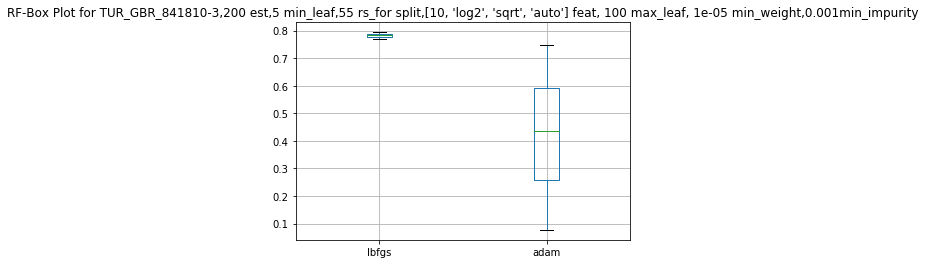

In [25]:
# MAIN for Neural Network Experiments
repeats=3
random_range_for_split=1
rs=random.randint(1,100)
#rs=12
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()

alpha_options = [0.0001,0.00000001]
solver_options = ['lbfgs', 'adam' ] # sgd solver cok sapıttı
max_iteration_options = [50000]#,60000,100000]
hidden_layer_sizes_options=[(30,100,10),(30,30),(100,100),(30,30,30)]


alph=0.0001 
slv='adam' 
max_iteration=200  
hidden_layer=(30,30)


param='TRUE'

for r in range (random_range_for_split):


    rs=random.randint(1,100)

    print('split rs=',rs)
    
    Scaled_Train_Test_Split=exp.X_Y_scaler_train_test_Split(X,y,Z,random=rs)

    X_train = Scaled_Train_Test_Split[0]
    X_test = Scaled_Train_Test_Split[1]
    y_train = Scaled_Train_Test_Split[2]
    y_test = Scaled_Train_Test_Split[3]
    scaler_X = Scaled_Train_Test_Split[4]  
    scaler_y = Scaled_Train_Test_Split[5]
    scaled_value_X=Scaled_Train_Test_Split[6]
    scaled_value_y=Scaled_Train_Test_Split[7]
    
    
    for slv in solver_options:
        results_exp[str(slv)] =experiment_NN(repeats,
                  X_train, X_test, y_train, y_test,scaler_y,
                  rand=20,is_random_fixed='FALSE',
                  alph=alph,max_iteration=max_iteration, slv=slv, hidden_layer=hidden_layer)[1] 
    
    results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()

plt.title("RF-Box Plot for {}-{},{} est,{} min_leaf,{} rs_for split,{} feat, {} max_leaf, {} min_weight,{}min_impurity"
          .format(y.name,MonthSeries,  est, min_leaf,rs,max_features_options,max_leaf,min_weight,min_impurity))
plt.savefig('RF-Box Plot for {}-{}, {} est,{} min_leaf,{} feat,{} max_leaf, {} min_weight,{}min_impurity.png'
               .format(y.name,MonthSeries,est,min_leaf,max_features_options,max_leaf,min_weight,min_impurity))





In [ ]:
results = DataFrame()
results_exp = DataFrame()
param='TRUE'
random_split='TRUE'
alpha_options = [0.0001,0.00000001,0.0000000001, 0.000000000001]
solver_options = ['lbfgs', 'adam' ] # sgd solver cok sapıttı
max_iteration_options = [50000,60000,100000]
#random_state_options =[1,10,50,75,200]
#random_state_options =[10,50,90]
random_state_options =[90]
hidden_layer_sizes_options=[(30,100,10),(30,30),(100,100),(30,30,30)]

alph=alpha_options[0]
max_iteration=max_iteration_options[0]
slv=solver_options[1]
rseed=random_state_options[0]
hidden_layer=hidden_layer_sizes_options[0]


for r in range (0,50):
        rs=random.randint(1,100)
        rs=42
        
        
        rs=42
        Scaled_Train_Test_Split=X_Y_scaler_train_test_Split(X,y,Z,random=rs)

        train_X = Scaled_Train_Test_Split[0].values
        test_X = Scaled_Train_Test_Split[1].values
        train_y = Scaled_Train_Test_Split[2].values
        test_y = Scaled_Train_Test_Split[3].values
        scaler_X = Scaled_Train_Test_Split[4]  
        scaler_y = Scaled_Train_Test_Split[5]
        scaled_value_X=Scaled_Train_Test_Split[6]
        scaled_value_y=Scaled_Train_Test_Split[7]
        
        
        
        
#        SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
#        print(rs)
        train_X=SplitData[0] 
        test_X=SplitData[1] 
        train_y=SplitData[2] 
        test_y=SplitData[3]
        scaler_x=SplitData[4]
        scaler_y=SplitData[5]
        split_succesfull=SplitData[7]

        for alph in alpha_options:
            rseed=90
            results_exp[str(alph)] = experiment_NN(repeats,param,alph,max_iteration,slv,rseed,hidden_layer,train_X, test_X, train_y, test_y,scaler_y)[1]
            

        results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()
plt.title("NN-Box Plot for {}-{}, {} alpha,{} max_ite,{} slv {}hiddenlayer "
          .format(y.name,MonthSeries,alpha_options,max_iteration,slv,hidden_layer))
plt.savefig("Data/18Mayıs/NN-Box Plot for {}-{}, {} alpha,{} max_ite,{} slv {}hiddenlayer.png "
          .format(y.name,MonthSeries,alpha_options,max_iteration,slv,hidden_layer), format='png', dpi=300)


In [ ]:
results = DataFrame()
results_exp = DataFrame()

alph=alpha_options[3]
max_iteration=max_iteration_options[0]
slv=solver_options[1]
rseed=random_state_options[0]
hidden_layer=hidden_layer_sizes_options[1]


for r in range (0,50):
        rs=random.randint(1,100)
        rs=42
        SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
#        print(rs)
        train_X=SplitData[0] 
        test_X=SplitData[1] 
        train_y=SplitData[2] 
        test_y=SplitData[3]
        scaler_x=SplitData[4]
        scaler_y=SplitData[5]
        split_succesfull=SplitData[7]

        for max_iteration in max_iteration_options:
            
            results_exp[str(max_iteration)] = experiment_NN(repeats,param,alph,max_iteration,slv,rseed,hidden_layer,train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]
            

        results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()
plt.title("NN-Box Plot for {}-{}, {} alpha,{} max_ite,{} slv {}hiddenlayer "
          .format(y.name,MonthSeries,alph,max_iteration_options,slv,hidden_layer))
plt.savefig("Data/18Mayıs/NN-Box Plot for {}-{}, {} alpha,{} max_ite,{} slv {}hiddenlayer.png "
          .format(y.name,MonthSeries,alph,max_iteration_options,slv,hidden_layer), format='png', dpi=300)


In [ ]:
results = DataFrame()
results_exp = DataFrame()

alph=alpha_options[3]
max_iteration=max_iteration_options[0]
slv=solver_options[1]
rseed=random_state_options[0]
hidden_layer=hidden_layer_sizes_options[1]

for r in range (0,50):
        rs=random.randint(1,100)
        rs=42
        SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
#        print(rs)
        train_X=SplitData[0] 
        test_X=SplitData[1] 
        train_y=SplitData[2] 
        test_y=SplitData[3]
        scaler_x=SplitData[4]
        scaler_y=SplitData[5]
        split_succesfull=SplitData[7]

        for slv in solver_options:
            
            results_exp[str(slv)] = experiment_NN(repeats,param,alph,max_iteration,slv,rseed,hidden_layer,train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]
            

        results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()
plt.title("NN-Box Plot for {}-{}, {} alpha,{} max_ite,{} slv {}hiddenlayer "
          .format(y.name,MonthSeries,alph,max_iteration,solver_options,hidden_layer))
plt.savefig("Data/18Mayıs/NN-Box Plot for {}-{}, {} alpha,{} max_ite,{} slv {}hiddenlayer.png "
          .format(y.name,MonthSeries,alph,max_iteration,solver_options,hidden_layer), format='png', dpi=300)


In [ ]:

results = DataFrame()
results_exp = DataFrame()

alph=alpha_options[3]
max_iteration=max_iteration_options[0]
slv=solver_options[1]
rseed=random_state_options[0]
hidden_layer=hidden_layer_sizes_options[1]

print('alph=',alph)
print('max_iteration=',max_iteration)
print('slv=',slv)
print('hidden_layer=',hidden_layer)




for r in range (0,50):
        rs=random.randint(1,100)
        rs=42
        SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
#        print(rs)
        train_X=SplitData[0] 
        test_X=SplitData[1] 
        train_y=SplitData[2] 
        test_y=SplitData[3]
        scaler_x=SplitData[4]
        scaler_y=SplitData[5]
        split_succesfull=SplitData[7]

        for hidden_layer in hidden_layer_sizes_options:
            
            results_exp[str(hidden_layer)] = experiment_NN(repeats,param,alph,max_iteration,slv,rseed,hidden_layer,train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]
            

        results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()
plt.title("NN-Box Plot for {}-{}, {} alpha,{} max_ite,{} slv {}hiddenlayer "
          .format(y.name,MonthSeries,alph,max_iteration,slv,hidden_layer_sizes_options))
plt.savefig("Data/18Mayıs/NN-Box Plot for {}-{}, {} alpha,{} max_ite,{} slv {}hiddenlayer.png "
          .format(y.name,MonthSeries,alph,max_iteration,slv,hidden_layer_sizes_options), format='png', dpi=300)


NN SONU